In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import lifetimes as life
pd.set_option("display.max_columns", 100)
%matplotlib inline

In [2]:
sales_data = pd.read_csv("shopify_orders_export_20180207.csv", low_memory=False )
sales_data['Paid at'] = pd.to_datetime(sales_data['Paid at'])
sales_data['Fulfilled at'] = pd.to_datetime(sales_data['Fulfilled at'])
sales_data['Created at'] = pd.to_datetime(sales_data['Created at'])
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29769 entries, 0 to 29768
Data columns (total 71 columns):
Name                           29769 non-null object
Email                          25455 non-null object
Financial Status               13708 non-null object
Paid at                        13172 non-null datetime64[ns]
Fulfillment Status             13708 non-null object
Fulfilled at                   13664 non-null datetime64[ns]
Accepts Marketing              13708 non-null object
Currency                       13708 non-null object
Subtotal                       13708 non-null float64
Shipping                       13708 non-null float64
Taxes                          13708 non-null float64
Total                          13708 non-null float64
Discount Code                  3200 non-null object
Discount Amount                13708 non-null float64
Shipping Method                6508 non-null object
Created at                     29769 non-null datetime64[ns]
Lineitem quantit

In [3]:
sales_data_clean = sales_data.drop(sales_data.columns.to_series()[-11:-1], axis=1)
sales_data_clean

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Phone
0,191569914712,gilly.glanville@me.com,paid,2018-02-08 03:59:00,fulfilled,2018-02-08 03:59:01,yes,SGD,290.0,0.0,0.0,290.0,5OFFe53b8c2fb9df,5.0,NaN,2018-02-08 03:59:00,1,Resist Skin Restoring Moisturizer SPF 50 - 60ml,48.0,0.0,7970,True,False,fulfilled,Gilly Glanville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,External Credit,c563530104851.1,0.0,Paula's Choice,0.0,Jeremy Tan,Beauty Collective,9.0,1.811065e+11,NaN,Low,pos,0.0,NaN
1,191569914712,gilly.glanville@me.com,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-08 03:59:00,1,Resist Optimal Results Hydrating Cleanser - 19...,36.0,0.0,7600,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paula's Choice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,191569914712,gilly.glanville@me.com,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-08 03:59:00,1,Resist Advanced Smoothing Treatment 10% AHA (G...,55.0,0.0,7651,True,True,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paula's Choice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,191569914712,gilly.glanville@me.com,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-08 03:59:00,1,Resist C15 Super Booster - 20 ml,68.0,0.0,7770,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paula's Choice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,191569914712,gilly.glanville@me.com,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-08 03:59:00,1,Clinical Ceramide-Enriched Firming Moisturizer,88.0,0.0,2120,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paula's Choice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
5,191569914711,stephaniedata@yahoo.com,paid,2018-02-08 03:39:25,unfulfilled,NaT,no,SGD,38.0,5.5,0.0,43.5,5OFF5359ca0ded5b,5.0,2 Working-Day Delivery,2018-02-08 03:39:25,1,Clear Acne Extra Strength Exfoliating Treatmen...,43.0,NaN,6210,True,False,pending,Stephanie Ng,"6 Napier Road 07-05, Gleneagles Medical Centre...",6 Napier Road 07-05,Gleneagles Medical Centre 07-05,The Dermatology Practice at Gleneagles,Singapore,'258499,NaN,SG,9001 9072,Stephanie Ng,"6 Napier Road 07-05, Gleneagles Medical Centre...",6 Napier Road 07-05,Gleneagles Medical Centre 07-05,The Dermatology Practice at Gleneagles,Singapore,'258499,NaN,SG,9001 9072,NaN,NaN,NaN,Stripe,c531555713043.1,0.0,Paula's Choice,0.0,NaN,NaN,NaN,1.810939e+11,NaN,Low,web,0.0,6.590019e+09
6,191569914710,hsmeaton@hotmail.com,paid,2018-02-08 00:42:57,unfulfilled,NaT,yes,SGD,48.0,9.0,0.0,57.0,NaN,0.0,Free Shipping above S$99 (ex.Taxes & Fees),2018-02-08 00:42:56,1,Calm Sensitive Daytime Moisturizer SPF 30 (Nor...,48.0,NaN,9130,True,False,pending,Heather Smeaton,"C3-4-1 Pantai Hillpark Phase 1, Jln Pantai Dalam",C3-4-1 Pantai Hillpark Phase 1,Jln Pantai Dalam,NaN,Kuala Lumpur,'59200,KUL,MY,'+60 12-395 5259,Heather Smeaton,"C3-4-1 Pantai Hillpark Phase 1, Jln Pantai Dalam",C3-4-1 Pantai Hillpark Phase 1,Jln Pantai Da

In [4]:
sales_data_2 = sales_data[sales_data['Financial Status'].isnull() == False]
sales_data_3 = sales_data_2[sales_data['Email'].isnull() == False]
sales_data_4 = sales_data_3[sales_data_3['Financial Status'] == 'paid']
sales_data_4

C:\Users\limzi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone
0,191569914712,gilly.glanville@me.com,paid,2018-02-08 03:59:00,fulfilled,2018-02-08 03:59:01,yes,SGD,290.0,0.0,0.0,290.0,5OFFe53b8c2fb9df,5.0,NaN,2018-02-08 03:59:00,1,Resist Skin Restoring Moisturizer SPF 50 - 60ml,48.0,0.0,7970,True,False,fulfilled,Gilly Glanville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,External Credit,c563530104851.1,0.0,Paula's Choice,0.0,Jeremy Tan,Beauty Collective,9.0,1.811065e+11,NaN,Low,pos,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,191569914711,stephaniedata@yahoo.com,paid,2018-02-08 03:39:25,unfulfilled,NaT,no,SGD,38.0,5.5,0.0,43.5,5OFF5359ca0ded5b,5.0,2 Working-Day Delivery,2018-02-08 03:39:25,1,Clear Acne Extra Strength Exfoliating Treatmen...,43.0,NaN,6210,True,False,pending,Stephanie Ng,"6 Napier Road 07-05, Gleneagles Medical Centre...",6 Napier Road 07-05,Gleneagles Medical Centre 07-05,The Dermatology Practice at Gleneagles,Singapore,'258499,NaN,SG,9001 9072,Stephanie Ng,"6 Napier Road 07-05, Gleneagles Medical Centre...",6 Napier Road 07-05,Gleneagles Medical Centre 07-05,The Dermatology Practice at Gleneagles,Singapore,'258499,NaN,SG,9001 9072,NaN,NaN,NaN,Stripe,c531555713043.1,0.0,Paula's Choice,0.0,NaN,NaN,NaN,1.810939e+11,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.590019e+09
6,191569914710,hsmeaton@hotmail.com,paid,2018-02-08 00:42:57,unfulfilled,NaT,yes,SGD,48.0,9.0,0.0,57.0,NaN,0.0,Free Shipping above S$99 (ex.Taxes & Fees),2018-02-08 00:42:56,1,Calm Sensitive Daytime Moisturizer SPF 30 (Nor...,48.0,NaN,9130,True,False,pending,Heather Smeaton,"C3-4-1 Pantai Hillpark Phase 1, Jln Pantai Dalam",C3-4-1 Pantai Hillpark Phase 1,Jln Pantai Dalam,NaN,Kuala Lumpur,'59200,KUL,MY,'+60 12-395 5259,Heather Smeaton,"C3-4-1 Pantai Hillpark Phase 1, Jln Pantai Dalam",C3-4-1 Pantai Hillpark Phase 1,Jln Pantai Dalam,NaN,Kuala Lumpur,'59200,KUL,MY,'+60 12-395 5259,NaN,NaN,NaN,Stripe,c563126239251.1,0.0,Paula's Choice,0.0,NaN,NaN,NaN,1.809537e+11,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,191569914709,litepiggy@yahoo.com.sg,paid,2018-02-07 14:58:31,unfulfilled,NaT,yes,SGD,75.0,0.0,0.0,75.0,NaN,0.0,Free Delivery (2 Working Days),2018-02-07 14:58:31,30,Resist Ultra-Light Super Antioxidant Concentra...,2.5,NaN,7749,True,False,pending,Christina Wu,Blk 612D Punggol Drive #14-867,Blk 612D Punggol Drive #14-867,NaN,NaN,Singapore,'824612,NaN,SG,9781 5411,Christina Wu,Blk 612D Punggol Drive #14-867,Blk 612D Punggol Drive #14-867,NaN,NaN,Singapore,'824612,NaN,SG,9781 5411,NaN,NaN,NaN,Stripe,c561475354643.1,0.0,Paula's Choice,0.0,NaN,NaN,NaN,1.803134e+11,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,191569914708,alyssacmy@gmail.com,paid,2018-02-07 13:45:51,unfulfilled,NaT,yes,SGD,42.0,5.5,0.0,47.5,5OFF22c18122b276,5.0,2 Working-Day Delivery,2018-02-07 13:45:51,1,Skin Perfecting 2% BHA (Salicylic Acid) Liquid...,13.0,NaN,2017,True,False,pending,Alyssa Chee,"1 Kaki Bukit View, #04-18 , Techview","1 Kaki Bukit View, #04-18 , Techview",NaN,NaN,Singapore,'415941,NaN,SG,83331068,Al

In [5]:
sales_data_5 = sales_data_4[['Paid at', 'Email', 'Subtotal']].reset_index()
sales_data_5.drop(['index'], axis=1, inplace=True)

In [6]:
# sales_data_5.to_csv("transaction_history.csv")

## Lifetimes uses some utility functions to transform that transactional data (one row per purchase) into summary data (a frequency, recency and age dataset).

In [7]:
from lifetimes.datasets import load_transaction_data
from lifetimes.utils import summary_data_from_transaction_data

In [98]:
transaction_data = sales_data_5.copy()
transaction_data.tail(10)

,Paid at,Email,Subtotal
11098,2016-12-01 23:14:15,emilymancer@gmail.com,109.0
11099,2016-12-01 17:50:16,chinyingqi@gmail.com,141.0
11100,2016-12-01 04:52:39,anradmacher@hotmail.com,225.0
11101,2016-11-29 09:44:08,raied.rahman@gmail.com,1.5
11102,2016-11-16 11:09:32,wytanj@gmail.com,0.0
11103,2016-11-11 13:53:07,raied.r@paulaschoice.sg,37.0
11104,2016-10-12 10:36:52,wytanj@gmail.com,3.0
11105,2016-10-12 06:48:15,wytanj@gmail.com,1.5
11106,2016-10-12 06:34:47,wytanj@gmail.com,43.0
11107,2016-10-04 10:58:07,wytanj@gmail.com,87.0


In [9]:
summary = summary_data_from_transaction_data(transactions= sales_data_5, 
                                             customer_id_col= 'Email', 
                                             datetime_col='Paid at',
                                             monetary_value_col='Subtotal',
                                             observation_period_end = None,
                                             freq="W")

In [10]:
# print out for preview

# summary.to_excel("Freq Recency Monetary Value.xlsx")
summary.sort_values(by='monetary_value', ascending=False)

,frequency,recency,T,monetary_value
Email,,,,
cherin@collardi.com,1.0,27.0,54.0,739.500000
matthewchiong@gmail.com,1.0,27.0,47.0,720.000000
blue_dynam1c@hotmail.com,2.0,27.0,33.0,684.500000
satpal18@gmail.com,1.0,7.0,25.0,631.000000
choimsik@hotmail.com,6.0,50.0,60.0,607.833333
dtwf94@gmail.com,1.0,20.0,25.0,559.000000
malshab@yahoo.com,1.0,17.0,24.0,538.500000
syerli@rocketmail.com,1.0,4.0,15.0,500.000000
tunguyenphuonglan@gmail.com,8.0,55.0,60.0,484.375000


In [89]:
from lifetimes import BetaGeoFitter

# similar API to scikit-learn and lifelines.
bgf = BetaGeoFitter()
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
print (bgf)


<lifetimes.BetaGeoFitter: fitted with 5247 subjects, a: 0.03, alpha: 19.73, b: 0.67, r: 0.58>


The following code plots the heterogenity of both parameters for visualization.  

(to update)
_As we can see, the death rate centers around the 30%-40% probability but a large portion of customer cohort's still have a high chance of dying after each purchase._ 

The heterogenity of λ is mostly distributed around 0 and 0.02 with a few having a small tail.

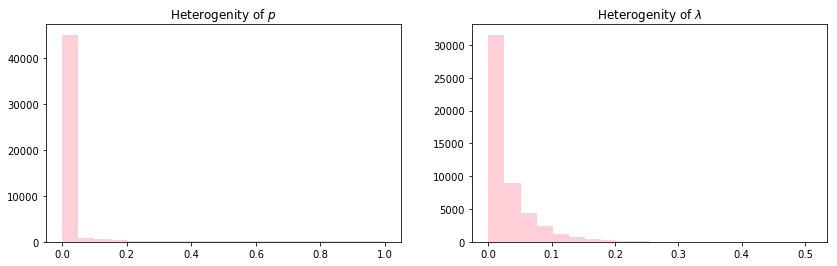

In [12]:
from scipy.stats import beta
from scipy.stats import gamma
gbd = beta.rvs(bgf.params_['a'], bgf.params_['b'], size = 50000)
ggd = gamma.rvs(bgf.params_['r'], scale=1./bgf.params_['alpha'], size = 50000)
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title('Heterogenity of $p$')
temp = plt.hist(gbd, 20, facecolor='pink', alpha=0.75)
plt.subplot(122)
plt.title('Heterogenity of $\lambda$')
temp = plt.hist(ggd, 20, facecolor='pink', alpha=0.75)

### The first Recency-Frequency plot maps a customer's expected purchases by the next year, and the second maps the probability that they're alive given his or her frequency/recency. 

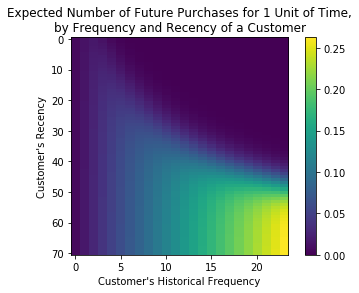

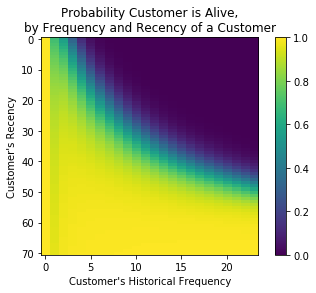

In [97]:
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(bgf, T=1)
# plt.savefig('CLTV.png')
plt.show()

from lifetimes.plotting import plot_probability_alive_matrix
plt.title("Probability a customer is still alive")
plot_probability_alive_matrix(bgf)
# plt.savefig('Probability a customer is still alive.png')
plt.show()

Customers with high frequency and recency are expected to purchase more in the future and have a higher chance of being alive.  Customers in the blue zone are also of interest, since they are 50/50 on leaving the company but we can still expect them to purchase about 4-6 times during next year.

In the first chart, we can see that if a customer has bought 20 times from you, and their lastest purchase was when they were 70 days old (given the individual is 70 days old), then **they are your best customer (bottom-right)**. You **coldest customers** are those that in the **top-right corner**: they bought a lot quickly, and we haven't seen them in weeks.

There's also that "tail" around (5,70). That represents the customer who buys infrequently, but we've seen him or her recently, so they *might* buy again - we're not sure if they are dead or just between purchases.

In [101]:
t = 10
summary['predicted_purchases'] = summary.apply(lambda r: bgf.conditional_expected_number_of_purchases_up_to_time(t, r['frequency'], r['recency'], r['T']), axis=1)
# alternative formula to produce same predicted purchases column
# summary['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency'], summary['recency'], summary['T'])
summary.sort_values(by='predicted_purchases', ascending=False)

,frequency,recency,T,monetary_value,predicted_purchases
Email,,,,,
juhinggeklynn@gmail.com,19.0,42.0,43.0,190.342105,3.108270
aliceklk@gmail.com,23.0,56.0,61.0,70.826087,2.899756
rogini611@gmail.com,21.0,59.0,62.0,188.880952,2.628074
charissa_chang@hotmail.com,19.0,53.0,58.0,82.421053,2.500796
yashoda_20@hotmail.com,18.0,57.0,59.0,252.666667,2.349936
jerlyn@hotmail.sg,15.0,43.0,51.0,120.533333,2.171551
bgchua2857@hotmail.com,15.0,51.0,55.0,287.833333,2.071761
phyuwint1231@gmail.com,15.0,55.0,56.0,107.200000,2.048862
jadeywj@hotmail.com,16.0,60.0,61.0,100.562500,2.045861


In [15]:
# summary.to_excel('CLTV_analysis.xlsx')

In [16]:
sales_data_clean[sales_data_clean['Email'] == "aliceklk@gmail.com"]

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Phone
2231,191569914-1597,aliceklk@gmail.com,paid,2018-01-03 03:48:47,fulfilled,2018-01-03 03:48:47,yes,SGD,113.0,0.0,0.0,113.0,NaN,0.0,NaN,2018-01-03 03:48:46,2,All Over Hair & Body Shampoo - 429 ml,29.0,NaN,5000,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stripe,c437864923155.1,0.0,Paula's Choice,0.0,Eli Goh,Front Porch,14.0,1.285093e+11,NaN,Low,pos,0.0,NaN
2232,191569914-1597,aliceklk@gmail.com,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-03 03:48:46,1,Resist Ultra-Light Super Antioxidant Concentra...,55.0,NaN,7740,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paula's Choice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
5944,191569914-1378,aliceklk@gmail.com,paid,2017-11-10 08:00:12,fulfilled,2017-11-10 08:00:11,yes,SGD,43.0,0.0,0.0,43.0,Discount,5.0,NaN,2017-11-10 08:00:11,1,Resist Daily Pore-Refining Treatment 2% BHA (S...,48.0,NaN,7820,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stripe,c67180920851.1,0.0,Paula's Choice,0.0,Eli Goh,Front Porch,14.0,3.093168e+10,NaN,Low,pos,0.0,NaN
6012,191569914-1369,aliceklk@gmail.com,paid,2017-11-09 09:26:01,fulfilled,2017-11-09 09:26:01,yes,SGD,72.0,0.0,0.0,72.0,NaN,0.0,NaN,2017-11-09 09:26:01,2,Resist Perfectly Balanced Foaming Cleanser - 1...,36.0,NaN,7830,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stripe,c63955107859.1,0.0,Paula's Choice,0.0,Eli Goh,Front Porch,14.0,2.956100e+10,NaN,Low,pos,0.0,NaN
6353,191569914-1350,aliceklk@gmail.com,paid,2017-11-03 09:43:42,fulfilled,2017-11-03 09:43:41,yes,SGD,43.0,0.0,0.0,43.0,Discount,15.0,NaN,2017-11-03 09:43:41,2,All Over Hair & Body Shampoo - 429 ml,29.0,NaN,5000,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stripe,c44081938451.1,0.0,Paula's Choice,0.0,Eli Goh,Front Porch,14.0,1.738781e+10,NaN,Low,pos,0.0,NaN
8037,191569914-1272,aliceklk@gmail.com,paid,2017-10-10 03:54:32,fulfilled,2017-10-10 03:54:31,yes,SGD,209.0,0.0,0.0,209.0,Discount,15.0,NaN,2017-10-10 03:54:31,1,Power Couple: Resist C15 & Ultra-Light Antioxi...,109.0,NaN,4890,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stripe,c16987630163.1,0.0,Paula's Choice,0.0,Eli Goh,Front Porch,14.0,6.207809e+09,NaN,Low,pos,0.0,NaN
8038,191569914-1272,aliceklk@gmail.com,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-10 03:54:31,1,Resist Weightless Advanced Repairing Toner - 1...,38.0,NaN,7780,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paula's Choice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
8039,191569914-1272,aliceklk@gmail.com,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-10 03:54:31,1,Resist Youth-Extending Daily Hydrating Fluid S...,48.0,NaN,7800,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

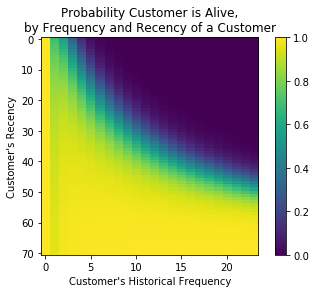

In [17]:
from lifetimes.plotting import plot_probability_alive_matrix
plt.title("Probability a customer is still alive")
plot_probability_alive_matrix(bgf)
# plt.savefig('Probability a customer is still alive.png')
plt.show()

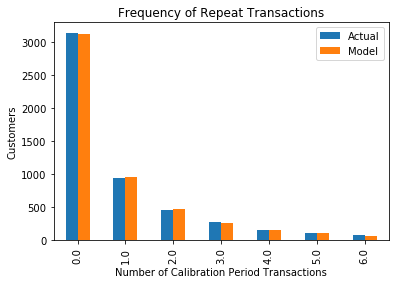

In [18]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

# More Model Fitting
To test how model performs on data not yet seen (think cross-validation in standard machine learning literature). Lifetimes has a function to partition dataset like this:

In [102]:
from lifetimes.utils import calibration_and_holdout_data

summary_cal_holdout = calibration_and_holdout_data(transactions= transaction_data, 
                                                   customer_id_col = 'Email', 
                                                   datetime_col= 'Paid at',
                                                   calibration_period_end= "2017-07-01",
                                                   # calibration_period_end= pd.to_datetime('2016-01-01',  format='%Y-%m-%d', errors='ignore') 
                                                   # observation_period_end='2017-12-31' 
                                                  )   

In the following **calibration vs holdout purchases plot**, we separate the data into both a in-sample (calibration) and validation (holdout) period.  

The sample period consists from the beginning to 1 June 2017; the validation period spans the rest of the 2017-2018 year. 

The plot groups all customers in the calibration period by their number of repeat purchases (x-axis) and then averages over their repeat purchases in the holdout period (y-axis).  

The orange and blue line presents the model prediction and actual result of the y-axis respectively.  

As we can see, up to until five repeat purchases, the model is able to fairly accurately predict the customer base's behavior out of sample.  After 5, the model does produce a lot more error and over-estimates the average repeat purchases.  This is due to the lack of data for those large repeat purchasing customers.

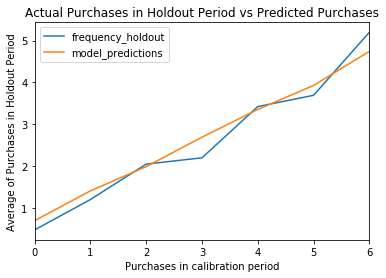

In [103]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

# Customer Predictions
Based on customer history, predict what an individual's future purchases might look like:

### Objective: create a new column of probabilities for "summary" table
### Trick lies in creating a function that loops across each row for calculation

In [39]:
t = 10 #predict purchases in 10 periods

index_probability = []
for index, row in summary.iterrows():

    row_probability = bgf.predict(t, 
                                  frequency= row['frequency'], 
                                  recency = row['recency'], 
                                  T = row['T'])
    index_probability.append([index, row_probability])
    
email_prob = pd.DataFrame(index_probability, columns=['Email', 'Probability'])
# email_prob.to_excel('email_prob.xlsx')

In [40]:
summary_cal_2 = summary_cal_holdout.reset_index()
merge_result = pd.merge(left=summary_cal_2, 
                                        right=email_prob,
                                        on="Email",
                                        how='left')
# merge_result.drop('Probability_x', axis=1, inplace=True)
# merge_result.to_excel("email probability result.xlsx")

'''
Failed implementation of function

def cltv_prob (t, email):
    individual = summary.loc[email]
    summary_cal_holdout['Probability'] = bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])
    
'''

### Based on customer history, the following predicts what an individual's future purchases might look like:

In [41]:
t=10
individual = summary.loc['ms.sue.adams@gmail.com']
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

0.032431808769529565

# Customer Probability Histories
Given a customer transaction history, we can calculate their historical probability of being alive, according to our trained model. For example:

(array([ 736511.,  736603.,  736695.,  736785.,  736876.,  736968.,
         737060.,  737150.,  737241.,  737333.,  737425.]),
 <a list of 11 Text xticklabel objects>)

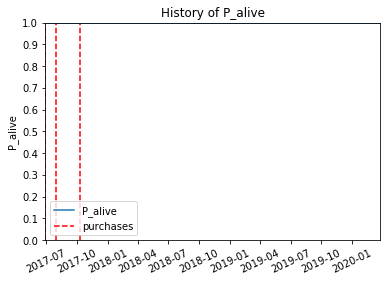

In [112]:
from lifetimes.plotting import plot_history_alive

id = "0306isabel@gmail.com"
days_since_birth = 1000
sp_trans = transaction_data.loc[transaction_data['Email'] == id]
plot_history_alive(model=bgf, 
                   t = days_since_birth, 
                   transactions = sp_trans, 
                   datetime_col = 'Paid at',
                  freq = "D")
plt.xticks(rotation=25)


Another Plotting Method
fig = plt.figure(figsize=(12,12))
for ind,i in enumerate(best_projected_cust.index.tolist()):
 ax = plt.subplot(4,2,ind+1)
 best_T = data.ix[i]['T']+31 #add a month
 best_trans = trans_data[trans_data['Customer ID'] == i]
 plot_history_alive(bgf, best_T, best_trans, 'Date', freq='D', ax=ax)
 ax.set_title('ID: '+str(i))
 plt.xticks(rotation=25)
fig.tight_layout()


# Estimating customer lifetime value using the Gamma-Gamma model
So far, 
1. the economic value of each transaction have not been taken into account. 
2. We focused mainly on transactions’ occurrences. 

Gamma-Gamma makes a few assumptions: 

1. At the customer level, the transaction/order value varies randomly around each customer’s average transaction value. (That, in itself, isn’t too controversial.) 

2. The observed mean value is an imperfect metric of the latent mean transaction value E(M), where M represents the monetary value. 

3. Average transaction value varies across customers, though these values are stationary. (This is a big assumption to make.)

4. The distribution of average values across customers is independent of the transaction process. In other words, monetary value can be modeled separately from the purchase count and lifetime components of the model. This may or may not hold in typical business situations.

### Training a simple Gamma-Gamma model on the monetary value 

The next steps is to look at the monetary value model. This model follows closely the Gamma-Gamma model discussed in Fader et al. (2004). Note that the monetary value component is generally very difficult to model. Many factors can affect the price of items in ways that are not accounted for by the model. Long term changes in prices over several years (akin to inflation), discounts, promotions, etc. are difficult to capture in this and other simple monetary value models. That is something to keep in mind when doing comparisons over the holdout period and making predictions for future purchases. 

In the gamma model, the observed average order value $m_x$ in the training period is an imperfect metric of the latent mean transaction value $E(M)$ at the customer level. 

The main assumption behind the gamma model is that the average order value at the customer level is distributed according to a gamma distribution of shape $p$ and scale $\nu$ 
$$ p(m_x~|~p, \nu, x) = \frac{(\nu x)^{px}m_x^{px-1}e^{-\nu x m_x}}{\Gamma(px)}$$

where 
* $x$ is the total number of transactions (`rfm['frequency']+1`) 
* $m_x$ is the average order value
* $p$ is the shape of the gamma distribution. The model assumes that this parameter is the same for all customers. 
* $\nu$ is the scale parameter. $\nu$ varies across customers and has a prior that is also gamma distributed with parameters $(q,\gamma)$

The expectation value of the gamma distribution, which is the mean purchase value is $p/\nu$ in this case. The MCMC sampling technique gives us the posterior distribution of $\nu$. To get an estimate of $E(M)$ at the customer level, one simply has to average the value of $p/\nu$ over the MCMC trace values of $\nu$ and $p$, at the customer level. We go over the steps in the cells below. 

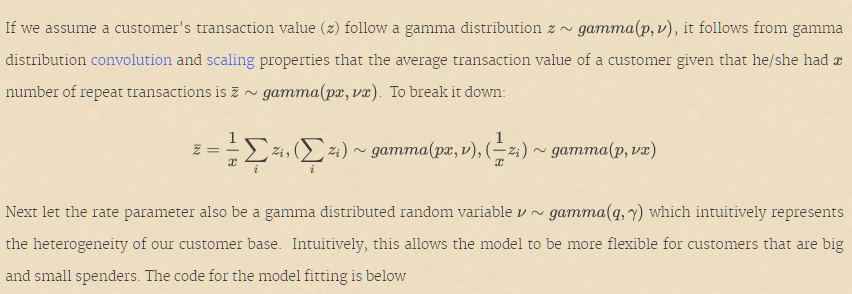

Firstly, we need to create summary data from transactional data also containing economic values for each transaction (i.e. profits or revenues).

In [43]:
from lifetimes.datasets import load_cdnow_summary_data_with_monetary_value

summary_with_money_value = summary.copy()
# summary_with_money_value[(summary_with_money_value['monetary_value']== 0)]

returning_customers_summary = summary_with_money_value[(summary_with_money_value['frequency']>0) & 
                                                       (summary_with_money_value['monetary_value']>0)]

returning_customers_summary

,frequency,recency,T,monetary_value,predicted_purchases
Email,,,,,
001coolgal@gmail.com,3.0,54.0,59.0,81.666667,0.448019
0306isabel@gmail.com,2.0,15.0,32.0,464.000000,0.475062
1070504395@qq.com,1.0,4.0,22.0,90.000000,0.342341
1404225C@gmail.com,1.0,20.0,32.0,48.000000,0.286433
1545742698@qq.com,2.0,35.0,59.0,39.500000,0.313695
4n1g3r@gmail.com,1.0,46.0,48.0,96.000000,0.223071
597893321@qq.com,1.0,2.0,4.0,42.000000,0.631165
602596417@qq.com,2.0,7.0,13.0,13.000000,0.763156
609757002@qq.com,1.0,22.0,25.0,132.000000,0.336395


### Gamma-Gamma submodel

The model we are going to use to estimate the CLV for our userbase is called the Gamma-Gamma submodel, which relies upon an important assumption: **that there is no relationship between the monetary value and the purchase frequency.** 

In practice, we need to check whether the Pearson correlation between the two vectors is close to 0 in order to use this model.

More info on the Gamma distribution can be found here
https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Gamma_Distribution_Fitting.pdf

In [44]:
returning_customers_summary[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.132885
frequency,0.132885,1.000000


The output isn't really close to zero, which means there **_is_** some correlation between monetary value and frequency of purchase. But we'll proceed anyway.

At this point we can train our Gamma-Gamma submodel and predict the conditional, expected average lifetime value of our customers.

In [113]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])
p,q,v = ggf._unload_params('p', 'q', 'v')
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2096 subjects, p: 2.60, q: 7.12, v: 269.16>


In [46]:
# now estimate the average transaction value:
pd.DataFrame(ggf.conditional_expected_average_profit(summary_with_money_value['frequency'],
                                              summary_with_money_value['monetary_value']))

,0
Email,
001coolgal@gmail.com,96.038486
007lavender@gmail.com,114.356390
0306isabel@gmail.com,274.974227
1060138073@qq.com,114.356390
1060138073A@gmail.com,114.356390
1070504395@qq.com,107.093919
1115006804@qq.com,114.356390
1293590203@qq.com,114.356390
1404225C@gmail.com,94.570562


In [114]:
print("Expected conditional average profit: %s, Population Average profit %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        summary_with_money_value['frequency'],
        summary_with_money_value['monetary_value']
    ).mean(),
    (p*v)/(q-1),
    summary_with_money_value[summary_with_money_value['frequency']>0]['monetary_value'].mean()
))

Expected conditional average profit: 114.33593603746688, Population Average profit 114.356392643, Average profit: 110.4840062840323


Expected conditional average profit calculates what we expect the mean profit to be for our currently observed customers and mixes it with the population average profit which is what the model thinks is to be over the long term for all customers.  This is because there's uncertainty from the amount of orders we have observed from an individual customer (customer frequency).

In [115]:
"""
To implement later
customer_scale = p*(v+ret_cust_data['frequency']*ret_cust_data['monetary_value'])
customer_shape = p*ret_cust_data['frequency']+q
ez = customer_scale/(customer_shape-1)
plt.figure(figsize=(12,6))
plt.xlabel('$ Profit')
for ind,i in enumerate(best_projected_cust.index.tolist()):
    ccig = invgamma.rvs(customer_shape[i], scale=customer_scale[i], size = 10000)
    plt.text(ez[i]+5, invgamma.pdf(ez[i], customer_shape[i], scale=customer_scale[i]),
             '$'+str(round(ez[i],2))+'| '+str(int(ret_cust_data.loc[i,'frequency'])))
    sns.distplot(ccig, hist=False, rug=False, label=str(i));
    
    
"""

"\nTo implement later\ncustomer_scale = p*(v+ret_cust_data['frequency']*ret_cust_data['monetary_value'])\ncustomer_shape = p*ret_cust_data['frequency']+q\nez = customer_scale/(customer_shape-1)\nplt.figure(figsize=(12,6))\nplt.xlabel('$ Profit')\nfor ind,i in enumerate(best_projected_cust.index.tolist()):\n    ccig = invgamma.rvs(customer_shape[i], scale=customer_scale[i], size = 10000)\n    plt.text(ez[i]+5, invgamma.pdf(ez[i], customer_shape[i], scale=customer_scale[i]),\n             '$'+str(round(ez[i],2))+'| '+str(int(ret_cust_data.loc[i,'frequency'])))\n    sns.distplot(ccig, hist=False, rug=False, label=str(i));\n    \n    \n"

In [135]:
# for computing the total CLV using the DCF method adjusting for cost of capital:
# https://en.wikipedia.org/wiki/Discounted_cash_flow
# refit the BG model to the summary_with_money_value dataset
bgf.fit(summary_with_money_value['frequency'], summary_with_money_value['recency'], summary_with_money_value['T'])

CLTV_Table = pd.DataFrame(ggf.customer_lifetime_value(
    transaction_prediction_model= bgf, #the model to use to predict the number of future transactions
    frequency= summary_with_money_value['frequency'],
    recency= summary_with_money_value['recency'],
    T= summary_with_money_value['T'],
    monetary_value = summary_with_money_value['monetary_value'],
    time=1, # the lifetime expected for the user in months. Default: 12
    discount_rate=0.01 #  the monthly adjusted discount rate. Default: 0.01
))

In [136]:
CLTV_Table.sort_values('clv', ascending=False)
# CLTV_Table.to_excel("CLTV_Estimation.xlsx")

,clv
Email,
sonic0204@hotmail.com,2076.104178
juhinggeklynn@gmail.com,1704.498877
yashoda_20@hotmail.com,1672.293873
bgchua2857@hotmail.com,1650.318551
lavie_ind@yahoo.com,1633.797124
rogini611@gmail.com,1433.532138
tunguyenphuonglan@gmail.com,1288.128051
alexis_lwy@yahoo.com,1247.270326
choimsik@hotmail.com,1156.322743
